In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn import set_config
set_config(display="diagram")


In [79]:
from BatteryProject.ModelTwo import trainer
from BatteryProject.ModelTwo.loss import root_mean_squared_error 

features = {
    'disc_capa' : 'summary_discharge_capacity.csv',
    'dis_ener' : 'summary_discharge_energy.csv',
    'temp_avg' : 'summary_temperature_average.csv',
    'char_capa' : 'summary_charge_capacity.csv',
}

In [80]:
trainer = trainer.Trainer(features)
trainer

In [81]:
trainer.get_data()

In [6]:
print(f"X_train.shape: {trainer.X_train.shape} y_train.shape: {trainer.y_train.shape}")

X_train.shape: (4409, 20, 5) y_train.shape: (4409,)


In [60]:
trainer.scaling()
trainer.get_baseline()
print("baseline:", trainer.baseline)

[[[  1.5689189    4.807014    32.31328964   1.0710737    0.        ]
  [  1.0731678    3.2680535   33.10474777   1.0725025    1.        ]
  [  1.0741653    3.2722847   33.09000015   1.0736545    2.        ]
  ...
  [  1.0768569    3.282582    33.13300705   1.076632    17.        ]
  [  1.0768059    3.2822788   33.15065765   1.0766392   18.        ]
  [  1.0768418    3.282212    33.14743805   1.0766382   19.        ]]

 [[  1.0766661    3.2819662   33.06366348   1.0764952   15.        ]
  [  1.0767251    3.2822409   33.12436295   1.076589    16.        ]
  [  1.0768569    3.282582    33.13300705   1.076632    17.        ]
  ...
  [  1.0768931    3.2803957   33.26432419   1.0766628   32.        ]
  [  1.0768956    3.2800434   33.25403595   1.0767494   33.        ]
  [  1.076942     3.2797248   33.23129654   1.0767286   34.        ]]

 [[  1.0769298    3.2804549   33.18383789   1.0766743   30.        ]
  [  1.0769316    3.280477    33.23272324   1.0767308   31.        ]
  [  1.0768931    

In [57]:
trainer.set_pipeline()

In [8]:
trainer.run()

Epoch 1/500
138/138 [==============================] - 2s 7ms/step - loss: 185453.5781 - root_mean_squared_error: 430.6432 - val_loss: 80006.6016 - val_root_mean_squared_error: 282.8544
Epoch 2/500
138/138 [==============================] - 1s 5ms/step - loss: 84652.6719 - root_mean_squared_error: 290.9513 - val_loss: 70723.5234 - val_root_mean_squared_error: 265.9389
Epoch 3/500
138/138 [==============================] - 1s 5ms/step - loss: 74543.1875 - root_mean_squared_error: 273.0260 - val_loss: 66319.0234 - val_root_mean_squared_error: 257.5248
Epoch 4/500
138/138 [==============================] - 1s 5ms/step - loss: 66361.8047 - root_mean_squared_error: 257.6078 - val_loss: 57824.9609 - val_root_mean_squared_error: 240.4682
Epoch 5/500
138/138 [==============================] - 1s 6ms/step - loss: 58877.8750 - root_mean_squared_error: 242.6476 - val_loss: 52850.3828 - val_root_mean_squared_error: 229.8921
Epoch 6/500
138/138 [==============================] - 1s 6ms/step - loss:

Mean absolute error: [570841.0, 570841.0]


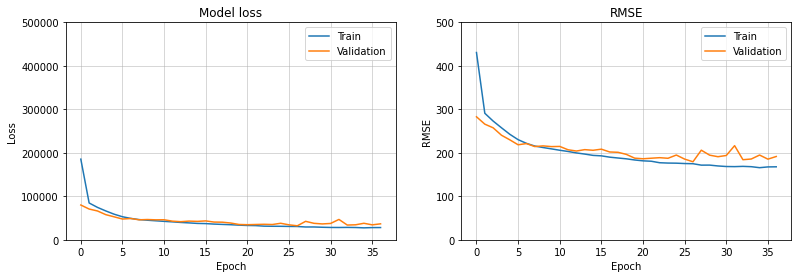

In [64]:
res = trainer.eval()
res
print(f'Mean absolute error: {res}')
trainer.plot_mse();

In [14]:
trainer.save_model_locally()

2022-06-22 05:20:35.406107: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://a21c0da4-f652-47cc-8cea-c42962581d75/assets
INFO:tensorflow:Assets written to: ram://8f95a087-a714-4b86-bba5-825cc8809b5e/assets


**Bad cells generation and prediction**

In [30]:
X_real, y_real = trainer.gen_one_cell(type="bad")
y_pred = trainer.predict(X_real)

print(f"Prédiction du nombre de cycles restants: {y_pred[0]} (real:{y_real}, error:{round(y_pred[0][0]-y_real,2)})")


Prédiction du nombre de cycles restants: [285.35568] (real:373, error:-87.64)


**Medium cells generation and prediction**

In [55]:
X_real, y_real = trainer.gen_one_cell(type="medium")
y_pred = trainer.predict(X_real)

print(f"Prédiction du nombre de cycles restants: {y_pred[0]} (real:{y_real}, error:{round(y_pred[0][0]-y_real,2)})")

Prédiction du nombre de cycles restants: [1148.8582] (real:583, error:565.86)


**Good cells generation and prediction**

In [273]:
X_real, y_real = trainer.gen_one_cell(type="good")
y_pred = trainer.predict(X_real)

print(f"Prédiction du nombre de cycles restants: {y_pred[0]} (real:{y_real}, error:{round(y_pred[0][0]-y_real,2)})")

Prédiction du nombre de cycles restants: [1606.7753] (real:1243, error:363.78)


**Test API**
- lancer le serveur avec "make run_api"
- bien s'assurer que le model2.joblib soit présent

In [76]:
import requests

def serialize_features(X):
    serial = X.flatten()
    return ",".join([str(i) for i in serial])


X_val, y_val = trainer.gen_one_cell(type="bad")


params = {
    "n_features": 5,
    "deep": 20,
    "X_val_serialized": serialize_features(X_val),
}

response = requests.get("http://127.0.0.1:8000/predict2", params=params)

if response.status_code == 200:
    print("API call success")
else:
    print("API call error", response.status_code)

print("prediction:", response.json()['predict'])
print('real:', y_val)

API call success
prediction: 157
real: 236
